<a href="https://colab.research.google.com/github/Popou123/Trabajo-Jaime-Rodriguez-Albuin/blob/main/TFG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Montamos el volumen de google drive en colab, puesto que ahí reside el dataset.
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import pandas as pd
metadatos = pd.read_csv('/content/gdrive/My Drive/Chest_xray_Corona_Metadata.csv')

In [ ]:
metadatos.head()

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN
1,1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN
2,2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN
3,3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,NaN
4,4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,NaN


In [ ]:
metadatos.isnull().sum()

Unnamed: 0                   0
X_ray_image_name             0
Label                        0
Dataset_type                 0
Label_2_Virus_category    5841
Label_1_Virus_category    1576
dtype: int64

In [ ]:
metadatos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5910 entries, 0 to 5909
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              5910 non-null   int64 
 1   X_ray_image_name        5910 non-null   object
 2   Label                   5910 non-null   object
 3   Dataset_type            5910 non-null   object
 4   Label_2_Virus_category  69 non-null     object
 5   Label_1_Virus_category  4334 non-null   object
dtypes: int64(1), object(5)
memory usage: 277.2+ KB


In [ ]:
metadatos.fillna('desconocido',inplace=True)

In [ ]:
metadatos.isnull().sum()

Unnamed: 0                0
X_ray_image_name          0
Label                     0
Dataset_type              0
Label_2_Virus_category    0
Label_1_Virus_category    0
dtype: int64

In [ ]:
print(metadatos["Label_1_Virus_category"].value_counts())
print("-"*50)
print(metadatos["Label_2_Virus_category"].value_counts())

bacteria          2777
desconocido       1576
Virus             1555
Stress-Smoking       2
Name: Label_1_Virus_category, dtype: int64
--------------------------------------------------
desconocido      5841
COVID-19           58
Streptococcus       5
SARS                4
ARDS                2
Name: Label_2_Virus_category, dtype: int64


In [ ]:
normales = metadatos[metadatos.Label=='Normal']
nombres_normales = normales['X_ray_image_name']
enfermos = metadatos[metadatos.Label=='Pnemonia']
nombres_enfermos = enfermos['X_ray_image_name']

In [ ]:
print("Número de radiografías de personas sanas: " + str(len(normales)))
print("Número de radiografías de personas enferma: " + str(len(enfermos)))

Número de radiografías de personas sanas: 1576
Número de radiografías de personas enferma: 4334


In [ ]:
print(nombres_enfermos.head())
#print("Normales: " + str(len(normales)))
#print("Enfermos: " + str(len(enfermos)))

1341         person101_virus_188.jpeg
1342         person101_virus_187.jpeg
1343       person1019_virus_1708.jpeg
1344       person1019_virus_1707.jpeg
1345    person1019_bacteria_2950.jpeg
Name: X_ray_image_name, dtype: object


In [ ]:
import os
import shutil

In [ ]:
directorio_train_og = '/content/gdrive/My Drive/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/train_og'
directorio_test_og = '/content/gdrive/My Drive/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/test_og'
normal = '/content/gdrive/My Drive/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/normal'
pneumonia = '/content/gdrive/My Drive/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/pneumonia'

In [ ]:
os.mkdir(normal)
os.mkdir(pneumonia)

In [ ]:
#Nos situamos en el directorio de entrenamiento del dataset mediante "os.chdir" para copiar las imágenes a las carpetas correspondientes,
#agrupándolas para poder manipularlas mejor.
os.chdir(directorio_train_og)
#Para cada nombre de las imágenes que se encuentran en el directorio de entrenamiento:
for n in nombres_normales:
  #Guardamos el nombre como una cadena. Recordemos que el módulo "os" y el módulo "shutil" trabajan con rutas.
  n_string = str(n)
  #Si existe dicha ruta, o de otra manera, dicho archivo (imagen.jpeg) en la carpeta de entrenamiento:
  if os.path.exists(n_string):
    #Montamos las rutas de origen, la cual será la ruta del directorio mas una barra y el nombre de la imagen, y la ruta de destino, la cual
    #indica dónde y qué vamos a copiar.
    origen = directorio_train_og + "/" + n_string
    destino =  normal + "/" + n_string
    shutil.copyfile(origen,destino)

#El mismo procedimiento que el anterior, esta vez buscando las radiografías de enfermos en la carpeta de entrenamiento.
for n in nombres_enfermos:
  n_string = str(n)
  if os.path.exists(n_string):
    origen = directorio_train_og + "/" + n_string
    destino = pneumonia + "/" + n_string
    shutil.copyfile(origen,destino)

#Nos situamos en la carpeta de test para repetir el mismo proceso que en la carpeta de entrenamiento.
os.chdir(directorio_test_og)
for n in nombres_normales:
  n_string = str(n)
  if os.path.exists(n_string):
    origen = directorio_test_og + "/" + n_string
    destino = normal + "/" + n_string
    shutil.copyfile(origen,destino)


for n in nombres_enfermos:
  n_string = str(n)
  if os.path.exists(n_string):
    origen = directorio_test_og + "/" + n_string
    destino = pneumonia + "/"  + n_string
    shutil.copyfile(origen,destino)

In [ ]:
#Comprobamos que se han copiado correctamente las imágenes. Hay ciertas entradas en el .csv que no existen o simplemente eran filas que guardaban otra información.
print("Cantidad de imágenes de entrenamiento: " + str(len(os.listdir(normal))))
print("Cantidad de imágenes de test: " + str(len(os.listdir(pneumonia))))

sum1 = len(os.listdir(normal)) + len(os.listdir(pneumonia))
sum2 = len(os.listdir(directorio_train_og)) + len(os.listdir(directorio_test_og))
print(sum1)
print(sum2)

In [ ]:
#Creamos la carpeta donde inicializaremos los generadores de imágenes de keras.
prep_red = '/content/gdrive/My Drive/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/prep'

In [ ]:
os.mkdir(prep_red)

In [ ]:
#Muevo las carpetas de radiografías de gente sana y de gente enferma a otra carpeta, donde dividiremos mediante un generador las muestras de entrenamiento, 
#,test y validación. 

shutil.move(normal,prep_red)
shutil.move(pneumonia,prep_red)

In [ ]:
#Comprobamos que se han movido correctamente:
normal2 = prep_red + "/normal"
pneumonia2 = prep_red + "/pneumonia"

print("Cantidad de imágenes de personas sanas: " + str(len(os.listdir(normal2))))
print("Cantidad de imágenes de personas enfermas: " + str(len(os.listdir(pneumonia2))))

sum1 = len(os.listdir(normal2)) + len(os.listdir(pneumonia2))
sum2 = len(os.listdir(directorio_train_og)) + len(os.listdir(directorio_test_og))
print(sum1)
print(sum2)

Cantidad de imágenes de personas sanas: 1576
Cantidad de imágenes de personas enfermas: 4334
5910
5933


In [3]:
prep_red = '/content/gdrive/My Drive/Coronahack-Chest-XRay-Dataset/Coronahack-Chest-XRay-Dataset/prep'
directorio_train = prep_red + "/train"
directorio_test = prep_red + "/test"
directorio_validation = prep_red + "/validation"

normal_train = directorio_train + "/normal"
normal_test = directorio_test + "/normal"
normal_validation = directorio_validation + "/normal"

pneumonia_train = directorio_train + "/pneumonia"
pneumonia_test = directorio_test + "/pneumonia"
pneumonia_validation = directorio_validation + "/pneumonia"

In [ ]:
os.mkdir(directorio_train)
os.mkdir(directorio_test)
os.mkdir(directorio_validation)


In [ ]:
os.mkdir(normal_train)
os.mkdir(normal_test)
os.mkdir(normal_validation)
os.mkdir(pneumonia_train)
os.mkdir(pneumonia_test)
os.mkdir(pneumonia_validation)

In [ ]:
os.mkdir(normal_validation)
os.mkdir(pneumonia_validation)

In [ ]:
os.mkdir(directorio_validation)
os.mkdir(pneumonia_validation)
os.mkdir(normal_validation)

In [ ]:
def divide_dataset(directorio, p, q):
  #Salvamos la dirección de la carpeta de radiografías de personas sanas para su posterior acceso.
  directorio_normal = directorio + "/normal"
  #Accedemos al directorio donde se encuentran todas las imágenes de personas sanas que existen en nuestro dataset.
  normales = os.listdir(directorio_normal)
  #Estas 3 variables nos servirán para decidir si una imagen se copiará a la carpeta de entrenamiento, a la de validación o a la de pruebas.
  #En "i" guardaremos el resultado de multiplicar el número total de imágenes de personas sanas del dataset por el porcentaje de muestras que queremos que
  #se situen entre entrenamiento y validación. Lo convertiremos a entero ya que querremos obtener un número entero de imágenes.
  i = int(len(normales)*p)
  #En "k" realizaremos la multiplicación entre "i" y "q", siendo q el porcentaje de muestras de validación que salvaremos, contando con que el resto lo usaremos
  #para entrenamiento. También lo convertiremos a entero por las mismas razones. 
  k = int(i*q)
  #En "e" guardaremos el resto de imágenes normales guardaremos en entrenamiento, siendo estas parte del número de muestras que acoge "i" (número total de imágenes
  #entre entrenamiento y validación). 
  
  #Ejemplo: En caso de tener 10 muestras, si queremos guardar el 80% para entrenamiento y validación nos quedarían 8. Si de esas 8 quisiéramos un cuarto para validación
  #tendríamos que multiplicar ese 8 por 0.25, de manera que nos quedarían 2 muestras para validación. Por ello, el número de muestras para entrenamiento
  #debería ser el número total entre entrenamiento y validación menos el número de muestras para validación: 8-2 = 6 imágenes de entrenamiento. 

  e = i-k
  #Inicializaremos los contadores que servirán para decidir en qué directorio copiaremos las imágenes para separarlas en entrenamiento, validación y pruebas.
  x = 0
  v = 0
  for n in normales:
    if x<=e:
      #Si x es menor que el número de imágenes correspondientes a entrenamiento:

      #Guardamos el nombre como una cadena. Recordemos que el módulo "os" y el módulo "shutil" trabajan con rutas.
      n_string = str(n)
      #Montamos las rutas de origen, la cual será la ruta del directorio mas una barra y el nombre de la imagen, y la ruta de destino, la cual
      #indica dónde y qué vamos a copiar.
      origen = directorio_normal + "/" + n_string
      destino =  directorio + "/train/normal/" + n_string
      shutil.copyfile(origen,destino)
      x += 1
    elif x>e and v<=k:
      #Si x es mayor que el número de muestras de entrenamiento, pero es menor que el número de muestras de validación:

      n_string = str(n)
      origen = directorio_normal + "/" + n_string
      destino =  directorio + "/validation/normal/" + n_string
      shutil.copyfile(origen,destino)
      v +=1
    else:
      #En cualquier otro caso la guardaremos en test.
      n_string = str(n)
      origen = directorio_normal + "/" + n_string
      destino =  directorio + "/test/normal/" + n_string
      shutil.copyfile(origen,destino)
      
  #Repetimos el mismo proceso anterior pero esta vez para las radiografías de pacientes enfermos.
  
  directorio_pneumonia = directorio + "/pneumonia"
  enfermos = os.listdir(directorio_pneumonia)
  j = int(len(enfermos)*p)
  l = int(j*q)
  w = j-l
  z = 0
  y = 0
  
  for n in enfermos:
    if y<=w: 
      #Guardamos el nombre como una cadena. Recordemos que el módulo "os" y el módulo "shutil" trabajan con rutas.
      n_string = str(n)
      #Montamos las rutas de origen, la cual será la ruta del directorio mas una barra y el nombre de la imagen, y la ruta de destino, la cual
      #indica dónde y qué vamos a copiar.
      origen = directorio_pneumonia + "/" + n_string
      destino =  directorio + "/train/pneumonia/" + n_string
      shutil.copyfile(origen,destino)
      y += 1
    elif y>w and z<=l:
      n_string = str(n)
      #Montamos las rutas de origen, la cual será la ruta del directorio mas una barra y el nombre de la imagen, y la ruta de destino, la cual
      #indica dónde y qué vamos a copiar.
      origen = directorio_pneumonia + "/" + n_string
      destino =  directorio + "/validation/pneumonia/" + n_string
      shutil.copyfile(origen,destino)
      z +=1
    else:
      #Guardamos el nombre como una cadena. Recordemos que el módulo "os" y el módulo "shutil" trabajan con rutas.
      n_string = str(n)
      #Montamos las rutas de origen, la cual será la ruta del directorio mas una barra y el nombre de la imagen, y la ruta de destino, la cual
      #indica dónde y qué vamos a copiar.
      origen = directorio_pneumonia + "/" + n_string
      destino =  directorio + "/test/pneumonia/" + n_string
      shutil.copyfile(origen,destino)

In [ ]:
divide_dataset(prep_red,0.8,0.2)

In [ ]:
n_normales_train = len(os.listdir(str(prep_red + "/train/normal")))
n_enfermos_train = len(os.listdir(str(prep_red + "/train/pneumonia")))
n_normales_test = len(os.listdir(str(prep_red + "/test/normal")))
n_enfermos_test = len(os.listdir(str(prep_red + "/test/pneumonia")))
n_normales_val = len(os.listdir(str(prep_red + "/validation/normal")))
n_enfermos_val = len(os.listdir(str(prep_red + "/validation/pneumonia")))

print("Cantidad de imágenes de imágenes de pulmones sanos en la carpeta de entrenamiento: " + str(n_normales_train))
print("Cantidad de imágenes de imágenes de pulmones enfermos en la carpeta de entrenamiento: " + str(n_enfermos_train))
print("Cantidad de imágenes de imágenes de pulmones sanos en la carpeta de validación: " + str(n_normales_val))
print("Cantidad de imágenes de imágenes de pulmones enfermos en la carpeta de validación: " + str(n_enfermos_val))
print("Cantidad de imágenes de imágenes de pulmones sanos en la carpeta de test: " + str(n_normales_test))
print("Cantidad de imágenes de imágenes de pulmones enfermos en la carpeta de test: " + str(n_enfermos_test))

print("Imagenes de pacientes: " + str(n_normales_train + n_enfermos_train + n_normales_test + n_enfermos_test + n_normales_val + n_enfermos_val))

Cantidad de imágenes de imágenes de pulmones sanos en la carpeta de entrenamiento: 1009
Cantidad de imágenes de imágenes de pulmones enfermos en la carpeta de entrenamiento: 2775
Cantidad de imágenes de imágenes de pulmones sanos en la carpeta de validación: 253
Cantidad de imágenes de imágenes de pulmones enfermos en la carpeta de validación: 694
Cantidad de imágenes de imágenes de pulmones sanos en la carpeta de test: 314
Cantidad de imágenes de imágenes de pulmones enfermos en la carpeta de test: 865
Imagenes de pacientes: 5910


In [17]:
from keras import layers
from keras import models

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [ ]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [4]:
from keras.preprocessing.image import ImageDataGenerator

datagen_entrenamiento = ImageDataGenerator(rescale=1./255)
datagen_validacion = ImageDataGenerator(rescale=1./255)

generador_entrenamiento = datagen_entrenamiento.flow_from_directory(
    directorio_train,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

generador_validacion = datagen_validacion.flow_from_directory(
    directorio_validation,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 3784 images belonging to 2 classes.
Found 947 images belonging to 2 classes.


In [ ]:
historial = model.fit(
    generador_entrenamiento,
    steps_per_epoch=100,
    epochs=20,
    validation_data=generador_validacion,
    validation_steps=50
        )

Epoch 1/20
100/100 [==============================] - 1453s 15s/step - loss: 0.5720 - acc: 0.7283 - val_loss: 0.3348 - val_acc: 0.8574
Epoch 2/20
100/100 [==============================] - 452s 5s/step - loss: 0.3495 - acc: 0.8565
Epoch 3/20
100/100 [==============================] - 249s 2s/step - loss: 0.2464 - acc: 0.9101
Epoch 4/20
100/100 [==============================] - 148s 1s/step - loss: 0.1945 - acc: 0.9200
Epoch 5/20
100/100 [==============================] - 107s 1s/step - loss: 0.1995 - acc: 0.9154
Epoch 6/20
100/100 [==============================] - 103s 1s/step - loss: 0.1682 - acc: 0.9322
Epoch 7/20
100/100 [==============================] - 93s 929ms/step - loss: 0.1817 - acc: 0.9238
Epoch 8/20
100/100 [==============================] - 92s 916ms/step - loss: 0.1566 - acc: 0.9334
Epoch 9/20
100/100 [==============================] - 93s 922ms/step - loss: 0.1616 - acc: 0.9349
Epoch 10/20
100/100 [==============================] - 91s 907ms/step - loss: 0.1536 - acc:

In [ ]:
#Guardamos el modelo en el drive para no tener que entrenarlo cada vez que inicie el colab.
model.save('/content/gdrive/My Drive/primer_red.h5')

No handles with labels found to put in legend.


[0.7696572542190552, 0.878000020980835, 0.9082661271095276, 0.9213709831237793, 0.9279233813285828, 0.9284273982048035, 0.9294354915618896, 0.9440000057220459, 0.9409999847412109, 0.9394999742507935]


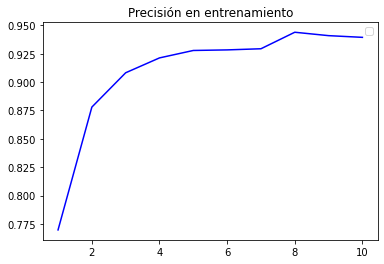

In [ ]:
#Mostraremos unas gráficas que muestren cómo han evolucionado tanto el valor de pérdida como la precisión:
from matplotlib import pyplot

prec = historial.history['acc']
validacion_prec = historial.history['val_acc']
perdida = historial.history['loss']
validacion_perdida = historial.history['val_loss']
print(prec)
n_epochs = range(1, len(prec) + 1)

pyplot.plot(n_epochs, prec, 'b', label='Precisión en entrenamiento')
pyplot.plot(n_epochs, validacion_prec, 'bo', label='Precisión en validación')
pyplot.title('Precisión en entrenamiento y validación')
pyplot.legend()
pyplot.show()

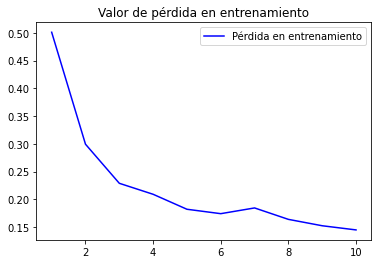

In [ ]:
pyplot.plot(n_epochs, perdida, 'b', label='Pérdida en entrenamiento')
pyplot.plot(n_epochs, val_loss, 'bo', label='Pérdida en validación')
pyplot.title('Valores de pérdida en entrenamiento y validación')
pyplot.legend()
pyplot.show()

In [ ]:
#Lo cargamos y comprobamos que se ha cargado correctamente.
from keras.models import load_model
modelo2 = load_model('/content/gdrive/My Drive/primer_red.h5')

In [ ]:
modelo2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

In [20]:
datagen_test = ImageDataGenerator(rescale=1./255)

generador_test = datagen_test.flow_from_directory(
directorio_test,
target_size=(150, 150),
batch_size=20,
class_mode='binary')


Found 1179 images belonging to 2 classes.


In [ ]:
historial_test_prec = []
historial_test_loss = []
pasos = 20
for i in range(pasos):
  ev = modelo2.evaluate(generador_test, steps=50)
  historial_test_loss.append(ev[0])
  historial_test_prec.append(ev[1])

50/50 [==============================] - 21s 418ms/step - loss: 0.1146 - acc: 0.9600


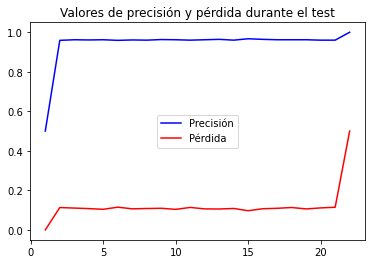

In [ ]:
from matplotlib import pyplot
#Copiamos el 
prec = historial_test_prec
loss = historial_test_loss

prec.insert(0,0.5)
prec.append(1)

loss.insert(0,0)
loss.append(0.5)

n_pasos = range(1, len(prec) + 1)

pyplot.plot(n_pasos, prec, 'b', label='Precisión')
pyplot.plot(n_pasos, loss, 'r', label='Pérdida')
pyplot.title('Valores de precisión y pérdida durante el test')
pyplot.legend()
pyplot.show()

In [6]:
#Ahora probaremos a modificar datos. Como no disponemos de más imágenes tendremos que realizar pequeñas modificaciones sobre las que ya poseemos:
generador_datos = ImageDataGenerator(
    #Rango de grado de rotación
    rotation_range=40,
    #Rango de anchura que se modificará
    width_shift_range=0.15,
    #Rango de altura que se modificará
    height_shift_range=0.15,
    #Rango de zoom
    zoom_range=0.15,
    #Si a algunas imágenes se les dará la vuelta horizontalmente
    horizontal_flip=True,
    #Qué hacer con los nuevos píxeles. En nuestro caso que obtengan el valor del píxel original más cercano
    fill_mode='nearest'
)

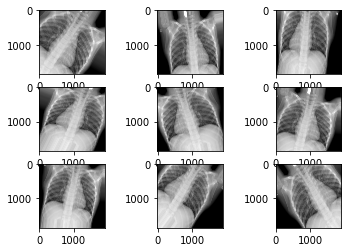

In [6]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from matplotlib import pyplot
from numpy import expand_dims

#Cargamos la imagen de ejemplo
imagen_prueba = load_img(directorio_train + '/normal/NORMAL2-IM-0401-0001.jpeg')
#La transformamos a array de numpy para poder tratarla
array = img_to_array(imagen_prueba)
#Le añadimos un eje más, ya que
muestra = expand_dims(array,0)
iterador = generador_datos.flow(muestra,batch_size=1)

for i in range(9):
  pyplot.subplot(330 + 1 + i)
	#Generamos un batch de imágenes
  batch = iterador.next()
	#Cambiamos los valores del array a enteros sin signo para poder mostrarlos con pyplot 
  image = batch[0].astype('uint8')
	#Mostramos la imagen
  pyplot.imshow(image)
#Mostramos la figura entera
pyplot.show()


In [7]:
#Ahora entrenaremos la red con este nuevo generador. Solo lo aplicaremos para las imágenes de entrenamiento, y no con las de validación.

datagen_entrenamiento = generador_datos
datagen_validacion = ImageDataGenerator(rescale=1./255)

generador_entrenamiento = datagen_entrenamiento.flow_from_directory(
    directorio_train,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

generador_validacion = datagen_validacion.flow_from_directory(
    directorio_validation,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 3784 images belonging to 2 classes.
Found 947 images belonging to 2 classes.


In [12]:
#Reiniciamos el modelo para poder comprobar su funcionamiento al añadir datos, y de paso le añadimos la capa de "dropout".

from keras import layers
from keras import models

modelo2 = models.Sequential()

modelo2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
modelo2.add(layers.MaxPooling2D((2, 2)))
modelo2.add(layers.Conv2D(64, (3, 3), activation='relu'))
modelo2.add(layers.MaxPooling2D((2, 2)))
modelo2.add(layers.Conv2D(128, (3, 3), activation='relu'))
modelo2.add(layers.MaxPooling2D((2, 2)))
modelo2.add(layers.Conv2D(128, (3, 3), activation='relu'))
modelo2.add(layers.MaxPooling2D((2, 2)))

modelo2.add(layers.Flatten())
modelo2.add(layers.Dropout(0.5))
modelo2.add(layers.Dense(512, activation='relu'))
modelo2.add(layers.Dense(1, activation='sigmoid'))

In [13]:
from keras import optimizers

modelo2.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [14]:
historial2 = modelo2.fit(
    generador_entrenamiento,
    steps_per_epoch=100,
    epochs=20,
    validation_data=generador_validacion,
    validation_steps=50
)

Epoch 1/20
100/100 [==============================] - 140s 1s/step - loss: 3.4372 - acc: 0.6630 - val_loss: 0.6853 - val_acc: 0.7328
Epoch 2/20
100/100 [==============================] - 119s 1s/step - loss: 0.6598 - acc: 0.7021
Epoch 3/20
100/100 [==============================] - 121s 1s/step - loss: 0.5577 - acc: 0.7759
Epoch 4/20
100/100 [==============================] - 116s 1s/step - loss: 0.5155 - acc: 0.7579
Epoch 5/20
100/100 [==============================] - 116s 1s/step - loss: 0.4284 - acc: 0.8119
Epoch 6/20
100/100 [==============================] - 115s 1s/step - loss: 0.4398 - acc: 0.8120
Epoch 7/20
100/100 [==============================] - 116s 1s/step - loss: 0.3991 - acc: 0.8258
Epoch 8/20
100/100 [==============================] - 116s 1s/step - loss: 0.4274 - acc: 0.8075
Epoch 9/20
100/100 [==============================] - 116s 1s/step - loss: 0.4103 - acc: 0.8295
Epoch 10/20
100/100 [==============================] - 115s 1s/step - loss: 0.3890 - acc: 0.8313
Ep

No handles with labels found to put in legend.


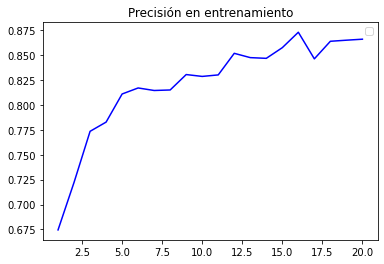

In [16]:
from matplotlib import pyplot
prec2 = historial2.history['acc']
#validacion_prec2 = historial2.history['val_acc']
perdida2 = historial2.history['loss']
#validacion_perdida2 = historial2.history['val_loss']
n_epochs2 = range(1, len(prec2) + 1)

pyplot.plot(n_epochs2, prec2, 'b')
#pyplot.plot(n_epochs2, validacion_prec2, 'b', label='Precisión en validación')
pyplot.title('Precisión en entrenamiento')
pyplot.legend()
pyplot.show()

No handles with labels found to put in legend.


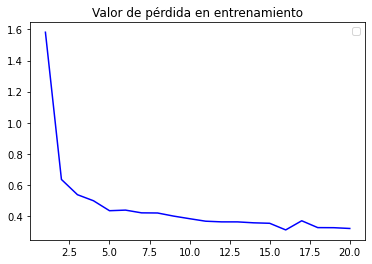

In [17]:
pyplot.plot(n_epochs2, perdida2, 'b')
#pyplot.plot(n_epochs2, val_loss2, 'b', label='Pérdida en validación')
pyplot.title('Valor de pérdida en entrenamiento')
pyplot.legend()
pyplot.show()

In [18]:
#Guardamos el nuevo modelo en el drive.
modelo2.save('/content/gdrive/My Drive/segunda_red.h5')

In [10]:
from keras.models import load_model
modelo2 = load_model('/content/gdrive/My Drive/segunda_red.h5')

In [24]:
historial2_test_prec = []
historial2_test_loss = []
pasos = 20
for i in range(pasos):
  ev = modelo2.evaluate(generador_test, steps=50)
  historial2_test_loss.append(ev[0])
  historial2_test_prec.append(ev[1])

50/50 [==============================] - 24s 483ms/step - loss: 0.6344 - acc: 0.7240


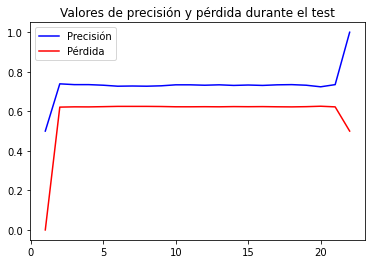

In [21]:
from matplotlib import pyplot
#Copiamos el 
prec = historial2_test_prec
loss = historial2_test_loss

prec.insert(0,0.5)
prec.append(1)

loss.insert(0,0)
loss.append(0.5)

n_pasos = range(1, len(prec) + 1)

pyplot.plot(n_pasos, prec, 'b', label='Precisión')
pyplot.plot(n_pasos, loss, 'r', label='Pérdida')
pyplot.title('Valores de precisión y pérdida durante el test')
pyplot.legend()
pyplot.show()